In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from pandas import DataFrame
from pandas import concat
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("rain.csv",index_col=0, parse_dates=True, skipinitialspace=True)
df.head()

,mm
Year,
1813-01-01,23.56
1814-01-01,26.07
1815-01-01,21.86
1816-01-01,31.24
1817-01-01,23.65


In [4]:
print("Shape:",df.shape)

Shape: (100, 1)


In [5]:
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
df.isnull().sum()

mm    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1813-01-01 to 1912-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mm      100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [8]:
# checking null values 

df.isna().sum()

mm    0
dtype: int64

In [9]:
# statistical analysis

df.describe()

,mm
count,100.000000
mean,24.823900
std,4.214531
min,16.930000
25%,22.202500
50%,23.870000
75%,27.510000
max,38.100000


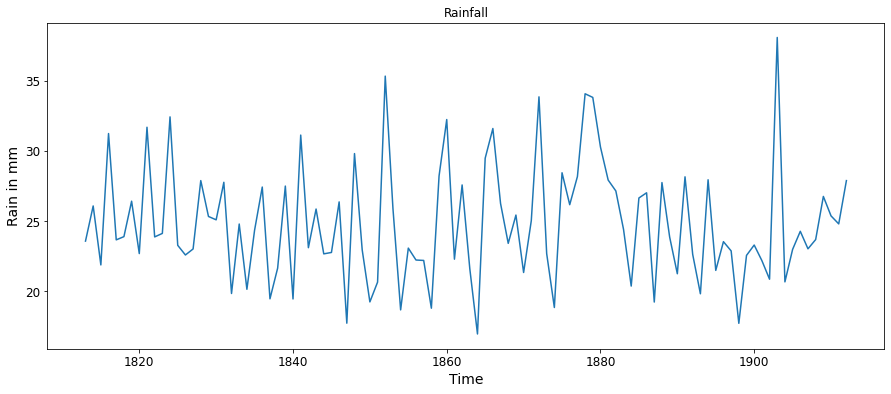

In [10]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.title('Rainfall')
plt.xlabel("Time")
plt.ylabel("Rain in mm")
plt.show()

<AxesSubplot:>

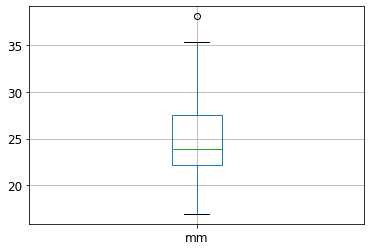

In [11]:
df.boxplot()

<AxesSubplot:xlabel='Year'>

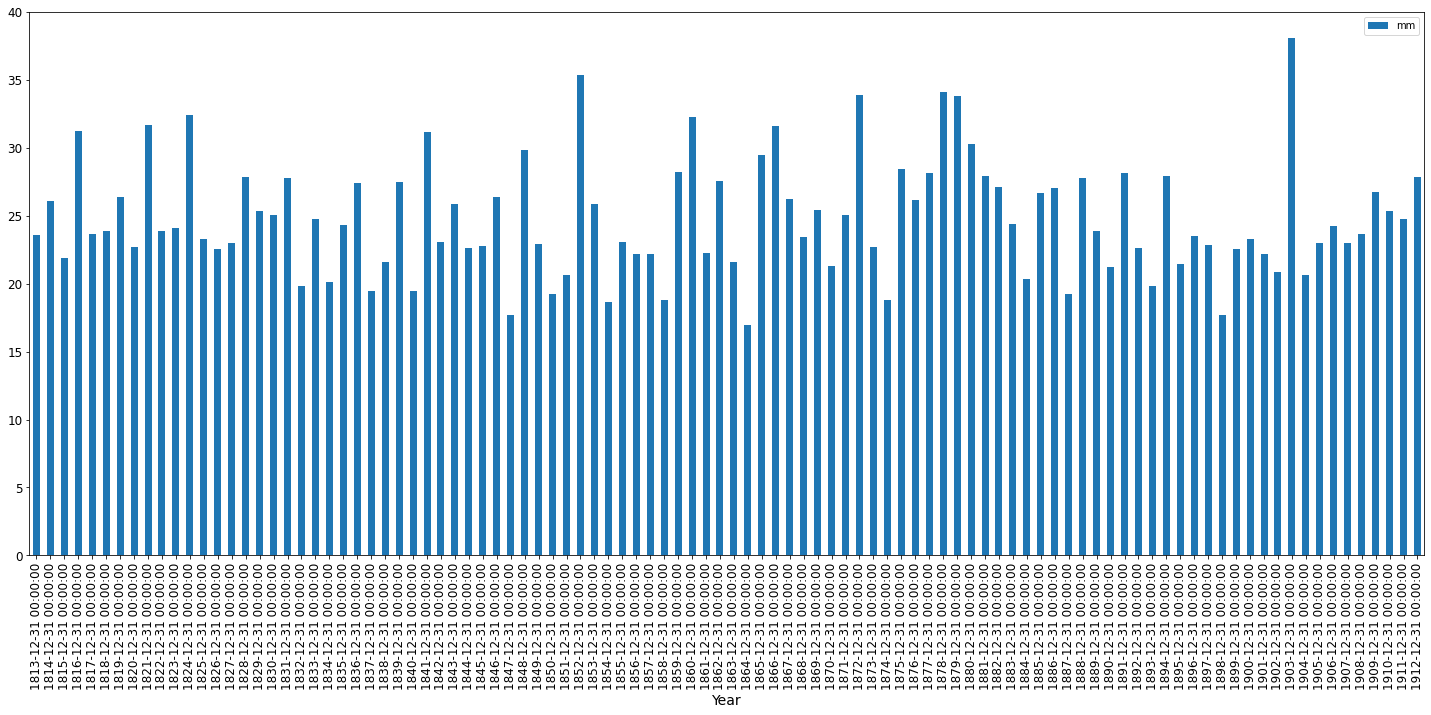

In [12]:
df.resample('Y').mean().plot.bar(y=['mm'], figsize=[25,10])

In [13]:
y = df['mm'].resample('y').mean()
y.head()

Year
1813-12-31    23.56
1814-12-31    26.07
1815-12-31    21.86
1816-12-31    31.24
1817-12-31    23.65
Freq: A-DEC, Name: mm, dtype: float64

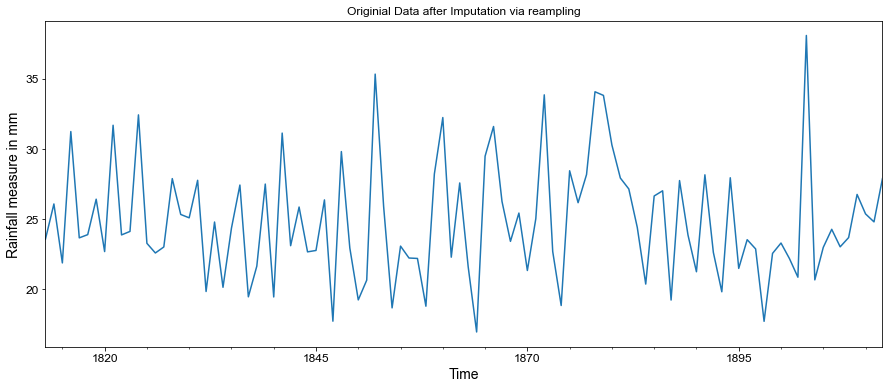

In [14]:
# Originial Data Representation
y.plot(figsize=(15, 6))
plt.title("Originial Data after Imputation via reampling")
plt.xlabel("Time")
plt.ylabel("Rainfall measure in mm")
plt.style.use('seaborn-whitegrid')
plt.show()

In [15]:
# We are using adfuller test for Checking Stationarity
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.502000
p-value: 0.000000
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583


## adfuller Test for stationarity

### Null Hypothesis:  It has some time dependent structure(series is non-stationary).

### Alternative Hypothesis: It has no time dependent structure(series is stationary).




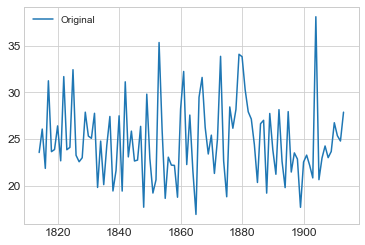

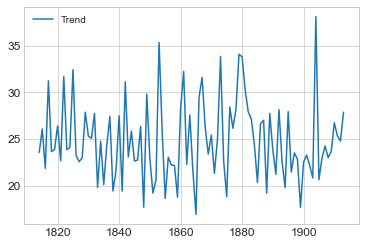

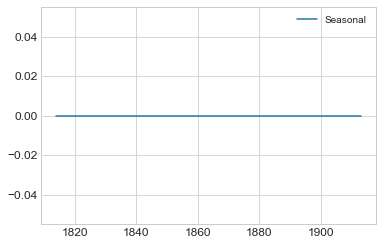

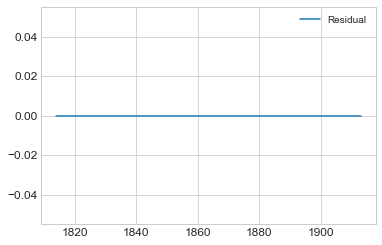

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.tight_layout()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

In [17]:
#Creating train and test set 

train=df[0:70]
test=df[70:100]

In [18]:
type(df)

pandas.core.frame.DataFrame

#### Let’s visualize the data (train and test together) to know how it varies over a time period.

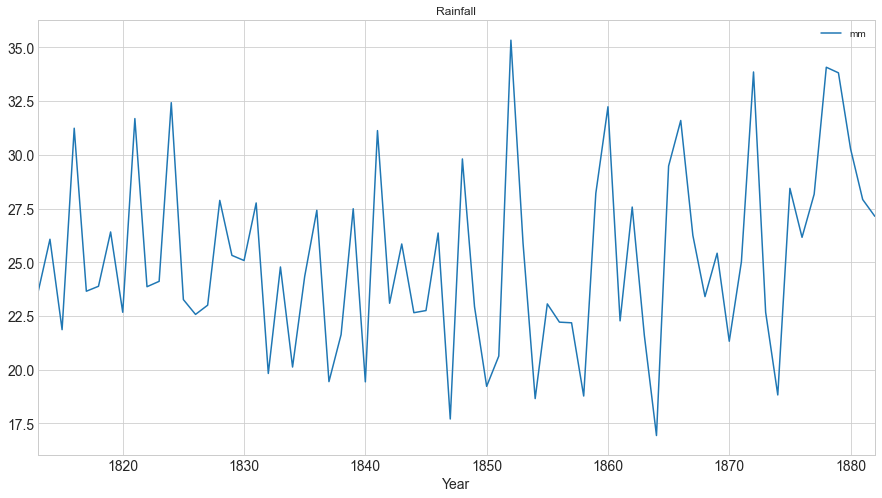

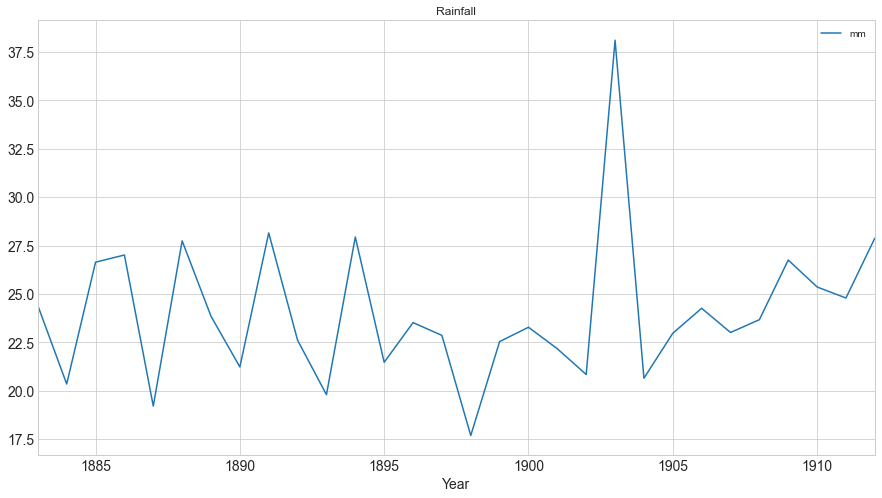

In [19]:
#Plotting data
train.plot(figsize=(15,8), title= 'Rainfall', fontsize=14)
test.plot(figsize=(15,8), title= 'Rainfall', fontsize=14)
plt.show()

### Method : – Simple Average

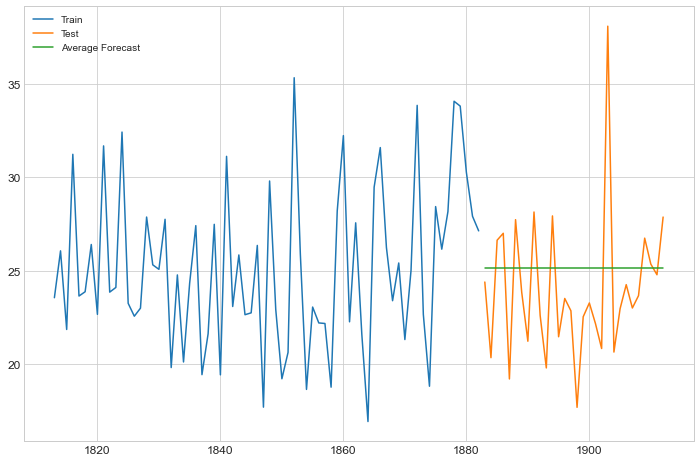

In [20]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train.mm.mean()
plt.figure(figsize=(12,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

#####  We will now calculate RMSE to check to accuracy of our model.

In [21]:
# import math
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test.mm, y_hat_avg.avg_forecast))
print(rms)

3.9438557870931024


# --------------------------------

## Moving Average

In [22]:
from pandas import concat

width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

                 mean    t-1    t+1
Year                               
1813-01-01        NaN    NaN  23.56
1814-01-01        NaN  23.56  26.07
1815-01-01        NaN  26.07  21.86
1816-01-01        NaN  21.86  31.24
1817-01-01  23.830000  31.24  23.65
1818-01-01  26.390000  23.65  23.88
1819-01-01  25.583333  23.88  26.41
1820-01-01  26.256667  26.41  22.67
1821-01-01  24.646667  22.67  31.69
1822-01-01  24.320000  31.69  23.86


In [23]:
df = pd.DataFrame(df)

Test RMSE: 19.715


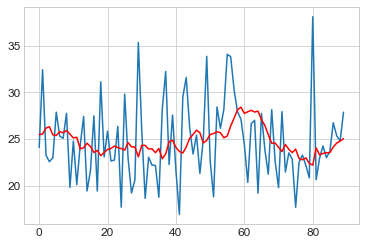

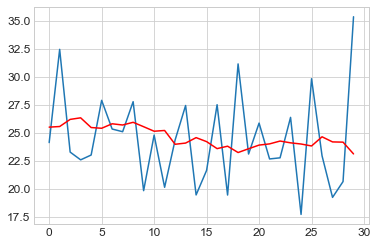

In [24]:
# prepare situation
from numpy import mean
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

X = df.mm
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:30])
pyplot.plot(predictions[0:30], color='red')
pyplot.show()

### `ARIMA`

                             ARIMA Model Results                              
Dep. Variable:                   D.mm   No. Observations:                   99
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -306.911
Method:                       css-mle   S.D. of innovations              5.365
Date:                Tue, 19 Jan 2021   AIC                            619.822
Time:                        09:17:16   BIC                            627.608
Sample:                    01-01-1814   HQIC                           622.972
                         - 01-01-1912                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.365      0.070      0.945      -0.689       0.740
ar.L1.D.mm    -0.4838      0.087     -5.547      0.000      -0.655      -0.313
                                    Roots           

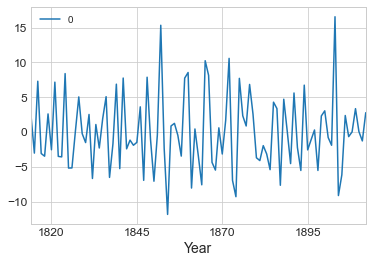

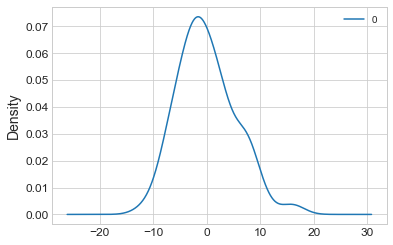

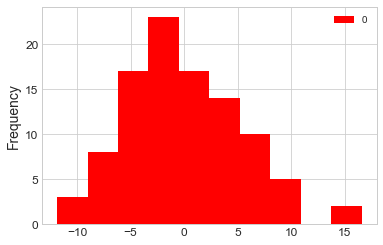

               0
count  99.000000
mean    0.012143
std     5.393280
min   -11.849551
25%    -3.491710
50%    -0.663524
75%     2.912707
max    16.578916


In [25]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from math import sqrt


x = df['mm']
# fit model
model = ARIMA(x, order=(1,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

residuals.plot(kind = 'hist', color = 'red')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [33]:
res = sm.tsa.ARMA(df['mm'], (1,1)).fit(disp=-1)
print(sm.stats.acorr_ljungbox(res.resid, lags=[1], return_df=True))
print(sm.stats.acorr_ljungbox(res.resid, lags=[20], return_df=True))

    lb_stat  lb_pvalue
1  0.003231   0.954671
      lb_stat  lb_pvalue
20  16.166076   0.706269


<AxesSubplot:xlabel='Year'>

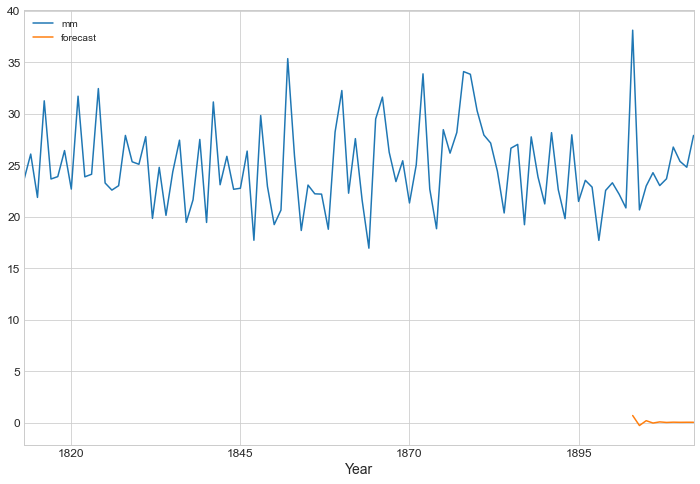

In [27]:
df['forecast']=model_fit.predict(start=90,end=120,dynamic=True)
df[['mm','forecast']].plot(figsize=(12,8))

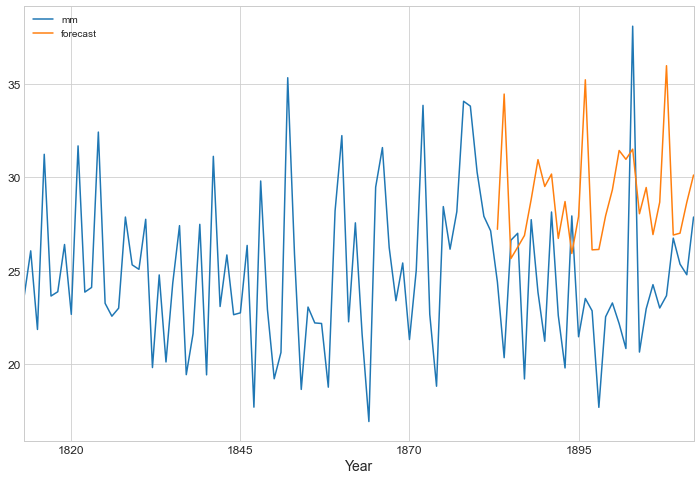

In [27]:
model=sm.tsa.statespace.SARIMAX(df['mm'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=70,end=100,dynamic=True)
df[['mm','forecast']].plot(figsize=(12,8))

### `Weighted Moving Average`

In [28]:
weights = np.arange(1,11) #this creates an array with integers 1 to 10 included
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [29]:
wma10 = train['mm'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10.head(20)

Year
1813-01-01          NaN
1814-01-01          NaN
1815-01-01          NaN
1816-01-01          NaN
1817-01-01          NaN
1818-01-01          NaN
1819-01-01          NaN
1820-01-01          NaN
1821-01-01          NaN
1822-01-01    25.778364
1823-01-01    25.527636
1824-01-01    26.779636
1825-01-01    26.248727
1826-01-01    25.566909
1827-01-01    25.120909
1828-01-01    25.574000
1829-01-01    25.488909
1830-01-01    25.380000
1831-01-01    25.714545
1832-01-01    24.676909
Name: mm, dtype: float64

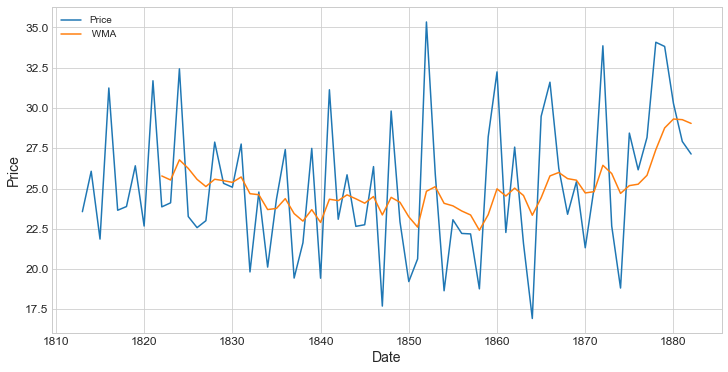

In [30]:
plt.figure(figsize = (12,6))
plt.plot(train['mm'], label="Price")
plt.plot(wma10, label=" WMA")

plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### simple Exponential Smoothening

In [41]:
train=df[0:70]
test=df[70:100]

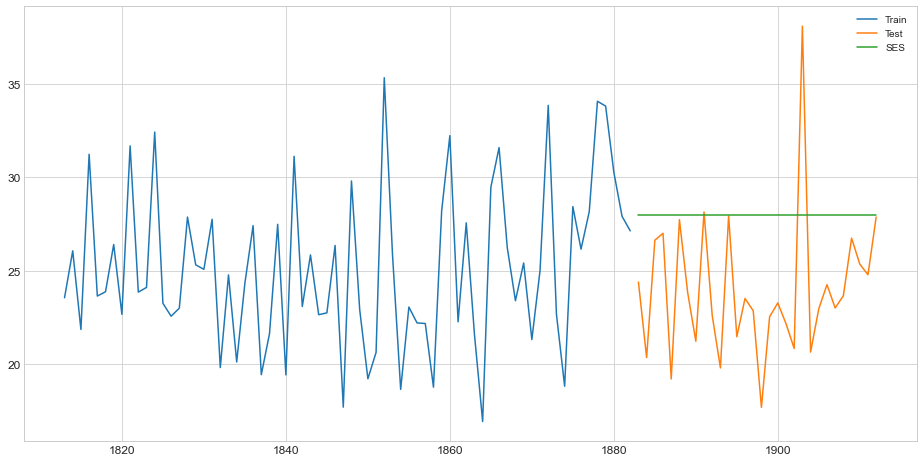

In [32]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['mm'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['mm'], label='Train')
plt.plot(test['mm'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [33]:
rms = sqrt(mean_squared_error(test.mm, y_hat_avg.SES))
print('RMSE:', rms)

RMSE: 5.477244277902385


### `Holt's Winter Method`

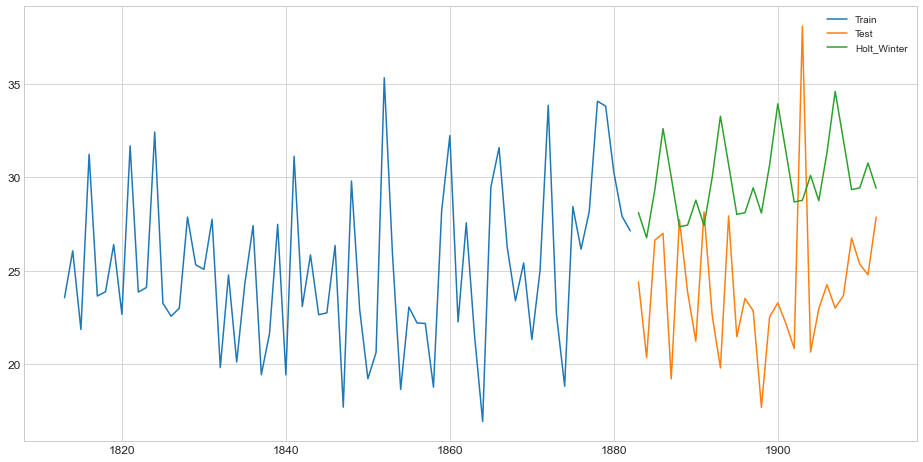

In [43]:
y_hat_avg = test.copy()
fit = ExponentialSmoothing(np.asarray(train['mm']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['mm'], label='Train')
plt.plot(test['mm'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

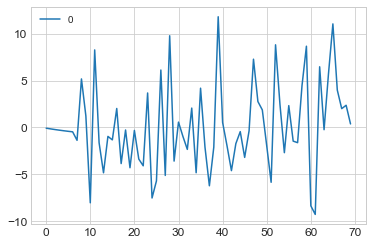

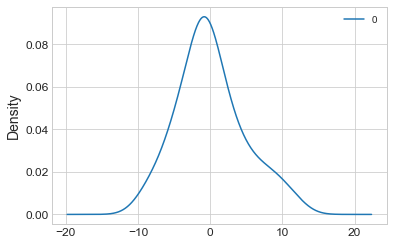

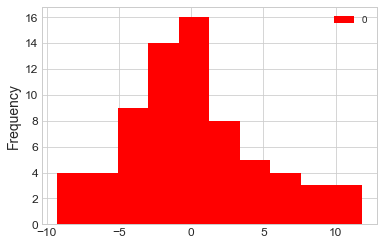

               0
count  70.000000
mean    0.076172
std     4.638359
min    -9.271175
25%    -2.604425
50%    -0.358056
75%     2.351816
max    11.796117


In [44]:
residuals = DataFrame(fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

residuals.plot(kind = 'hist', color = 'red')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [64]:
# ljungbox test

sm.stats.acorr_ljungbox(residuals, lags=[46], return_df=True)


,lb_stat,lb_pvalue
46,36.360932,0.844789


In [46]:
rms = sqrt(mean_squared_error(test.mm, y_hat_avg.Holt_Winter))
print('RMSE:', rms)

RMSE: 7.286142144692137


In [37]:
y_hat_avg

,mm,forecast,Holt_Winter
Year,,,
1883-01-01,24.40,27.223836,28.119927
1884-01-01,20.35,34.465445,26.767406
1885-01-01,26.64,25.658905,29.348650
1886-01-01,27.01,26.267114,32.616521
1887-01-01,19.21,26.893282,30.024953
1888-01-01,27.74,28.836683,27.359182
1889-01-01,23.85,30.954075,27.451020
1890-01-01,21.23,29.517463,28.783318
1891-01-01,28.15,30.182044,27.430797


### `AUTO CORRELATION AND PARTIAL AUTO CORRELATION PLOT` 

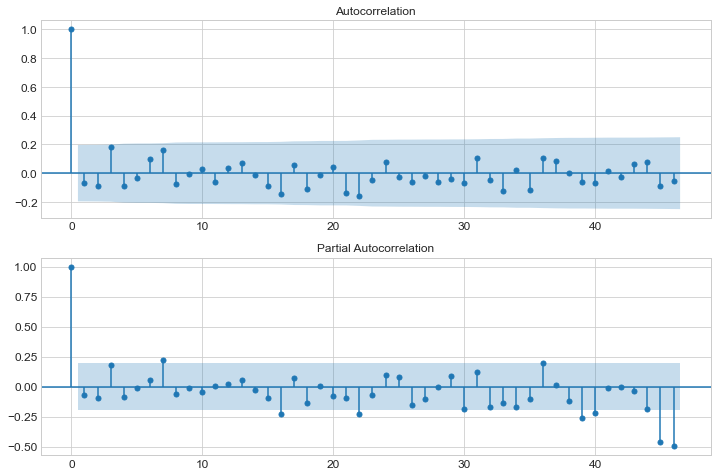

In [63]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['mm'],lags=46,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['mm'],lags=46,ax=ax2)

### `AUTO CORREALTION PLOT`

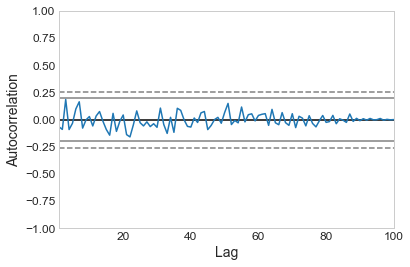

In [39]:
autocorrelation_plot(df['mm'])
plt.show()